<a href="https://colab.research.google.com/github/arwakhalidw/2024-GP-Group6/blob/main/AlzheimerPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# @title Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
!pip install mrmr_selection
from mrmr import mrmr_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
import warnings
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
!pip install pymrmr
from pymrmr import mRMR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut


warnings.filterwarnings('ignore')


In [91]:
# @title Reading and Copying the Dataset
# Read the dataset
dataset = pd.read_csv("alzheimer.csv")
# Copy the dataset
dataframe = dataset.copy() # to keep the original dataset unchanged

There are 10 features, they are as follows:
1.  Group is the Class lable
2.  M/F the gender of the patients
3.  Age is the Age of the patient
4.  EDUC are Years of Education
5.  SES are Socioeconomic Status on a scale from 1 to 5
6.  MMSE is Mini Mental State Examination
7.  CDR is Clinical Dementia Rating
8.  eTIV is Estimated total intracranial volume
9.  nWBV is Normalize Whole Brain Volume
10.  ASF is Atlas Scaling Factor







In [92]:
# @title Check the Data Shape
dataframe.shape

(373, 10)

In [93]:
# @title Display the First 5 Rows
dataframe.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [94]:
# @title Describe the Numeric Values in the Dataset
dataframe.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# Visualization

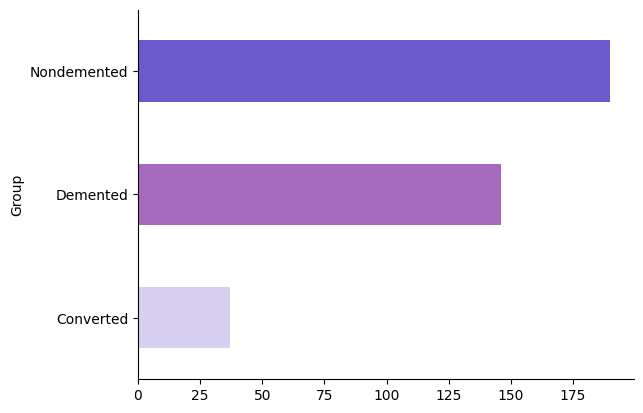

In [95]:
# @title Group

# Set the light, medium, and dark purple colors
light_purple = '#D6CFF0'
medium_purple = '#A569BD'
dark_purple = '#6A5ACD'

# Groupby and plot the dataframe
dataframe.groupby('Group').size().plot(kind='barh', color=[light_purple, medium_purple, dark_purple])

# Remove the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.show()

we have three categories:
1. Demented:
which is a lable given to patients with Alzhiemer
2. Nondemented:
which is a lable given to patients without Alzhiemer
3. Converted:
which is a lable given to patients diagnosed first to not have Alzhiemer but were converted to be patients with Alzhiemer

In [96]:
conuter = dataframe['Group'].value_counts()
print(conuter)

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64


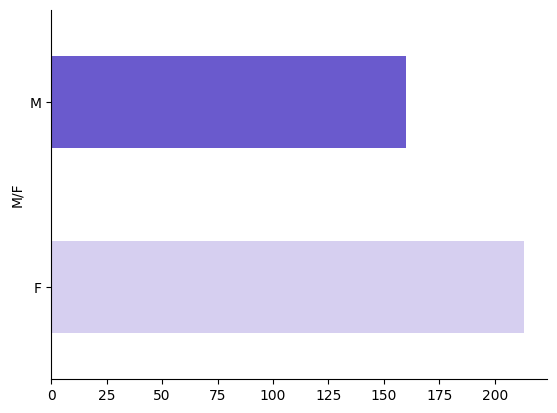

In [97]:
# @title M/F

# Set the light and dark purple colors
light_purple = '#D6CFF0'
dark_purple = '#6A5ACD'

# Groupby and plot the dataframe
dataframe.groupby('M/F').size().plot(kind='barh', color=[light_purple, dark_purple])

# Remove the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.show()

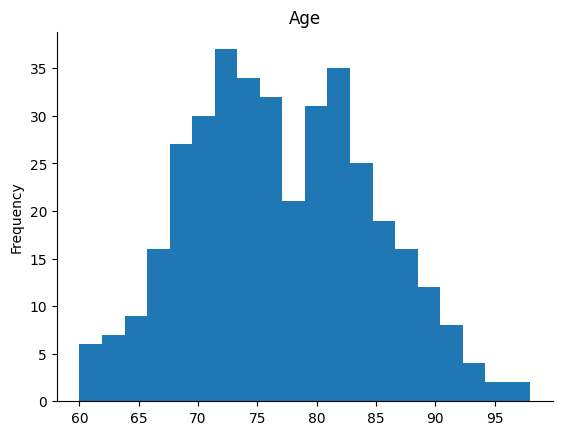

In [98]:
# @title Age

dataframe['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

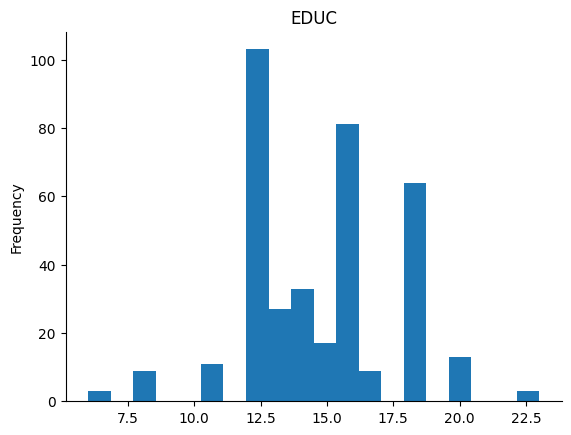

In [99]:
# @title EDUC

dataframe['EDUC'].plot(kind='hist', bins=20, title='EDUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

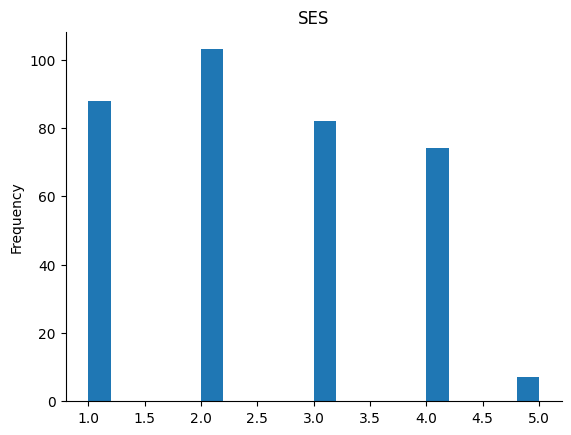

In [100]:
# @title SES

dataframe['SES'].plot(kind='hist', bins=20, title='SES')
plt.gca().spines[['top', 'right',]].set_visible(False)

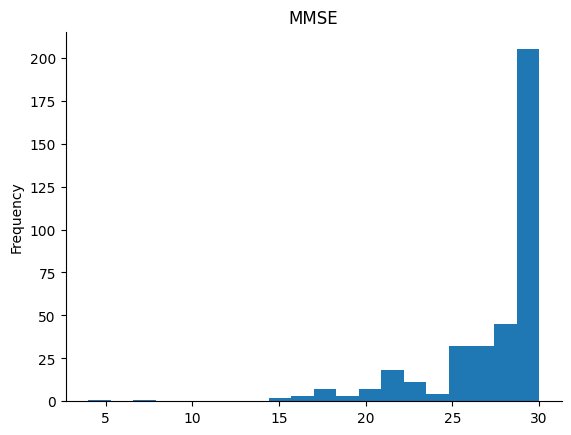

In [101]:
# @title MMSE

dataframe['MMSE'].plot(kind='hist', bins=20, title='MMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

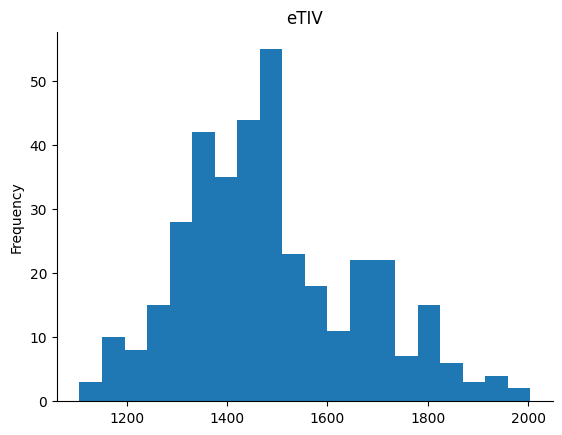

In [102]:
# @title eTIV

dataframe['eTIV'].plot(kind='hist', bins=20, title='eTIV')
plt.gca().spines[['top', 'right',]].set_visible(False)

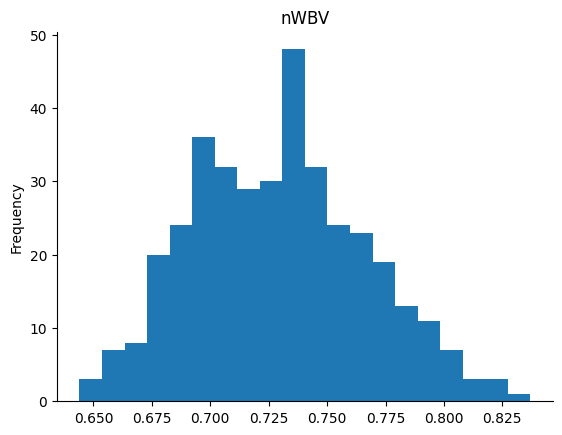

In [103]:
# @title nWBV

dataframe['nWBV'].plot(kind='hist', bins=20, title='nWBV')
plt.gca().spines[['top', 'right',]].set_visible(False)

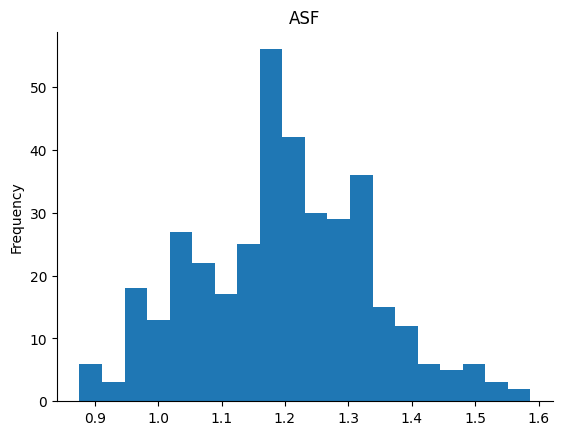

In [104]:
# @title ASF

dataframe['ASF'].plot(kind='hist', bins=20, title='ASF')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Changing The converted records to be demented

In [105]:
for index, row in dataframe.iterrows():
  if row['Group'] == 'Converted':
    dataframe.at[index, 'Group'] = 'Demented'

conuter = dataframe['Group'].value_counts()
print(conuter)

Group
Nondemented    190
Demented       183
Name: count, dtype: int64


# Data Cleaning


# Encoding

Encoding the M/F attribute to be 0 for M (male) and 1 for F (female) and the Group attribute to be 0 for Demented and 1 for Nondemented

In [106]:
Columns = ["Group","M/F"]
encode = LabelEncoder()
for i in Columns:
    dataframe[i] = encode.fit_transform(dataframe[i])
    # Reverse the encoding
    dataframe[i] = 1 - dataframe[i]
    print(dataframe[i].value_counts())
    print("------------------------")


Group
0    190
1    183
Name: count, dtype: int64
------------------------
M/F
1    213
0    160
Name: count, dtype: int64
------------------------


## Handeling Missing Values

In [107]:
# @title Check if Any Column has Null values in the Dataset
dataframe.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

As displayed, the SES and MMSE columns contain missing values. We replace said missing values with the median.

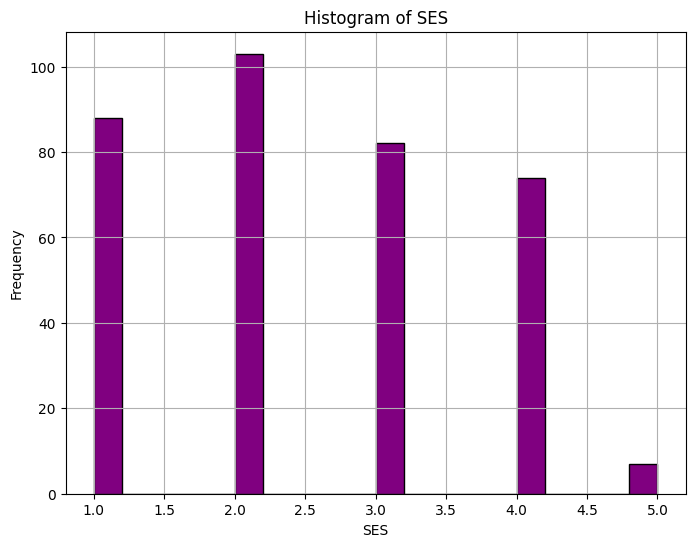

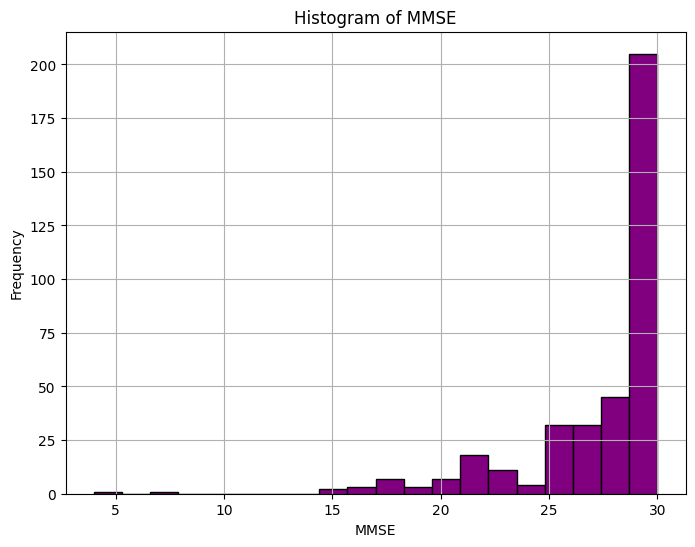

In [108]:


# Visualize MMSE and SES
def visualize(data, column_name):

    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, color='purple', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

visualize(dataframe['SES'], 'SES')

visualize(dataframe['MMSE'], 'MMSE')





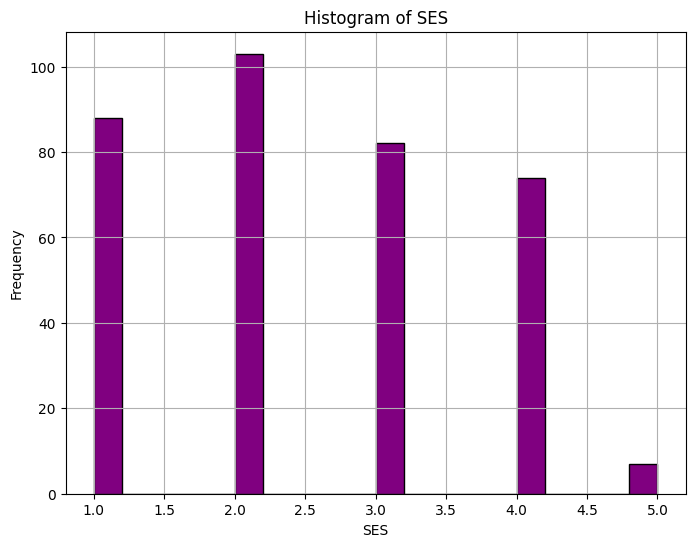

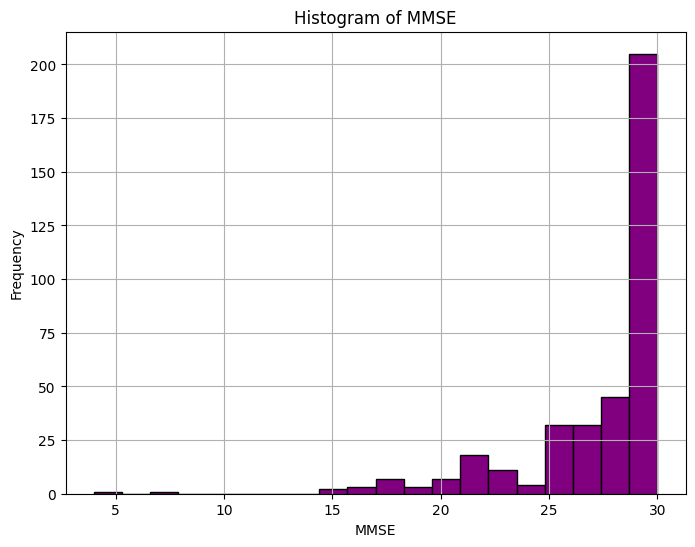

In [109]:
# Visualize MMSE and SES
def visualize(data, column_name):
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, color='purple', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histogram for SES
visualize(dataframe['SES'], 'SES')

# Plot histogram for MMSE
visualize(dataframe['MMSE'], 'MMSE')

# Replace missing values with median
dataframe['MMSE'].fillna(dataframe['MMSE'].median(), inplace=True)
dataframe['SES'].fillna(dataframe['SES'].median(), inplace=True)


In [110]:
## Check for missing values again
dataframe.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

## Outlier Detection

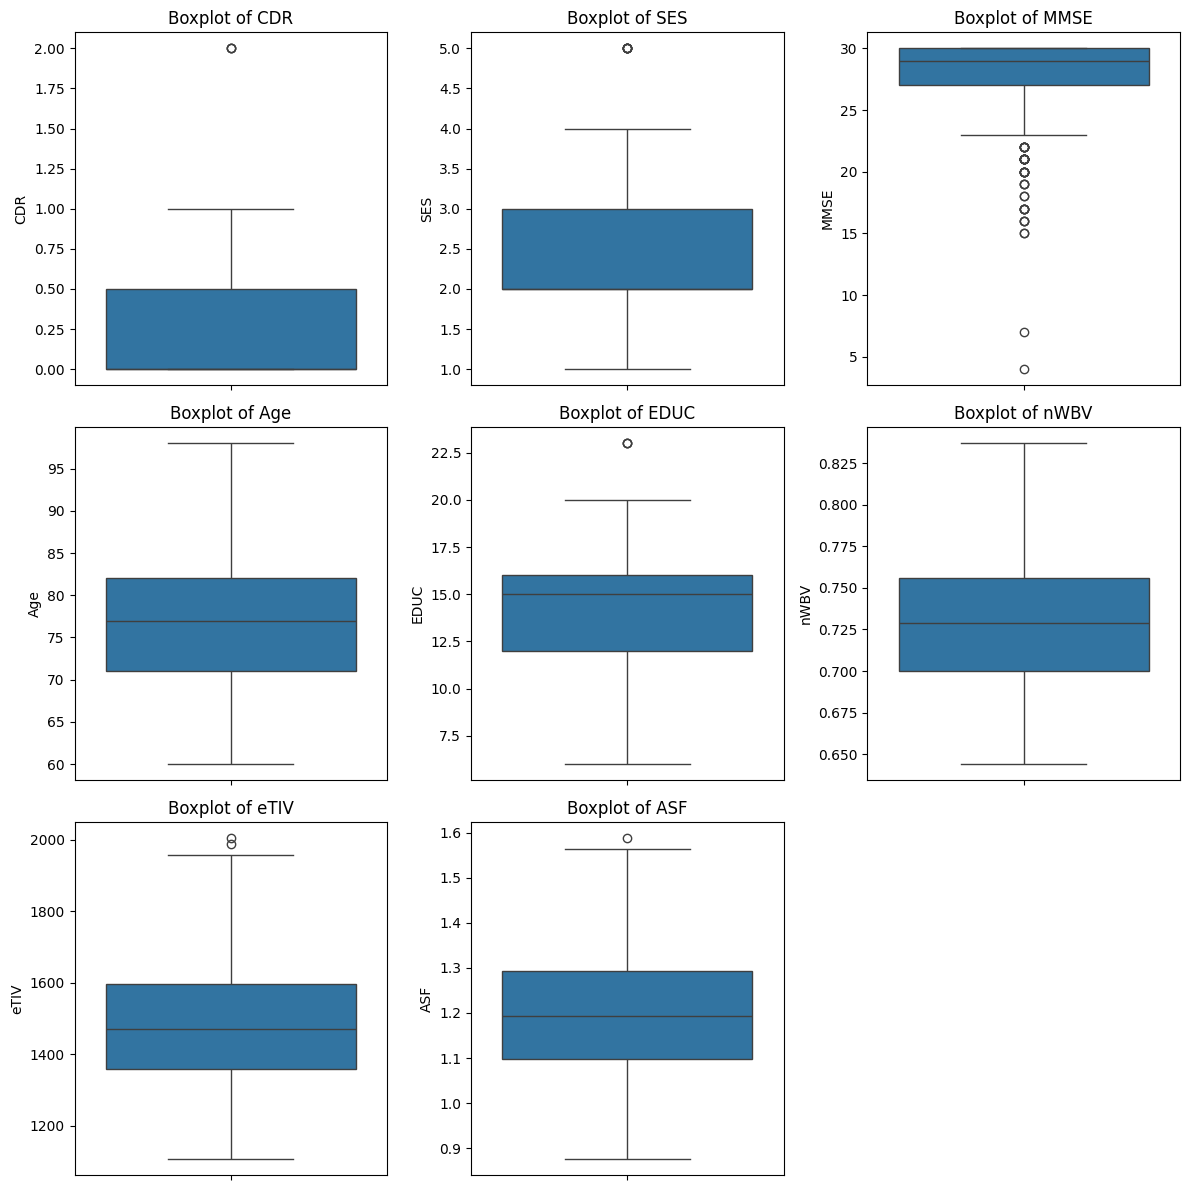

In [111]:
numeric_features = ['CDR','SES', 'MMSE', 'Age', 'EDUC', 'nWBV', 'eTIV', 'ASF']
std_dev=3

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataframe[feature])
    plt.title(f'Boxplot of {feature}')


# Adjust layout to prevent overlapping of subplots
plt.tight_layout()




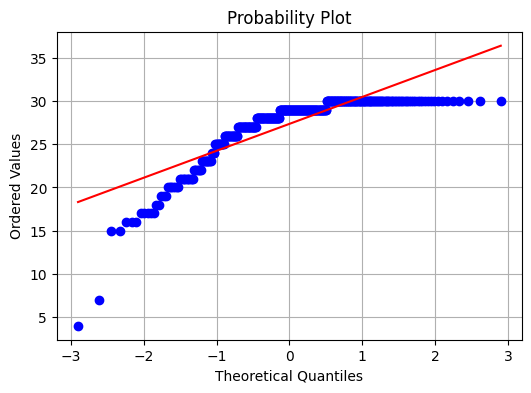

In [112]:
# Create a probability plot
plt.figure(figsize=(6, 4))
res = stats.probplot(dataframe['MMSE'], plot=plt)

# Visual inspection
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Probability Plot')
plt.grid(True)
plt.show()

The maximum score for the MMSE is 30. A score of 25 or higher is classed as normal. If the score is below 24, the result is usually considered to be abnormal, indicating possible cognitive impairment

# Exploratory Dataset Analysis



##Univariate Analysis

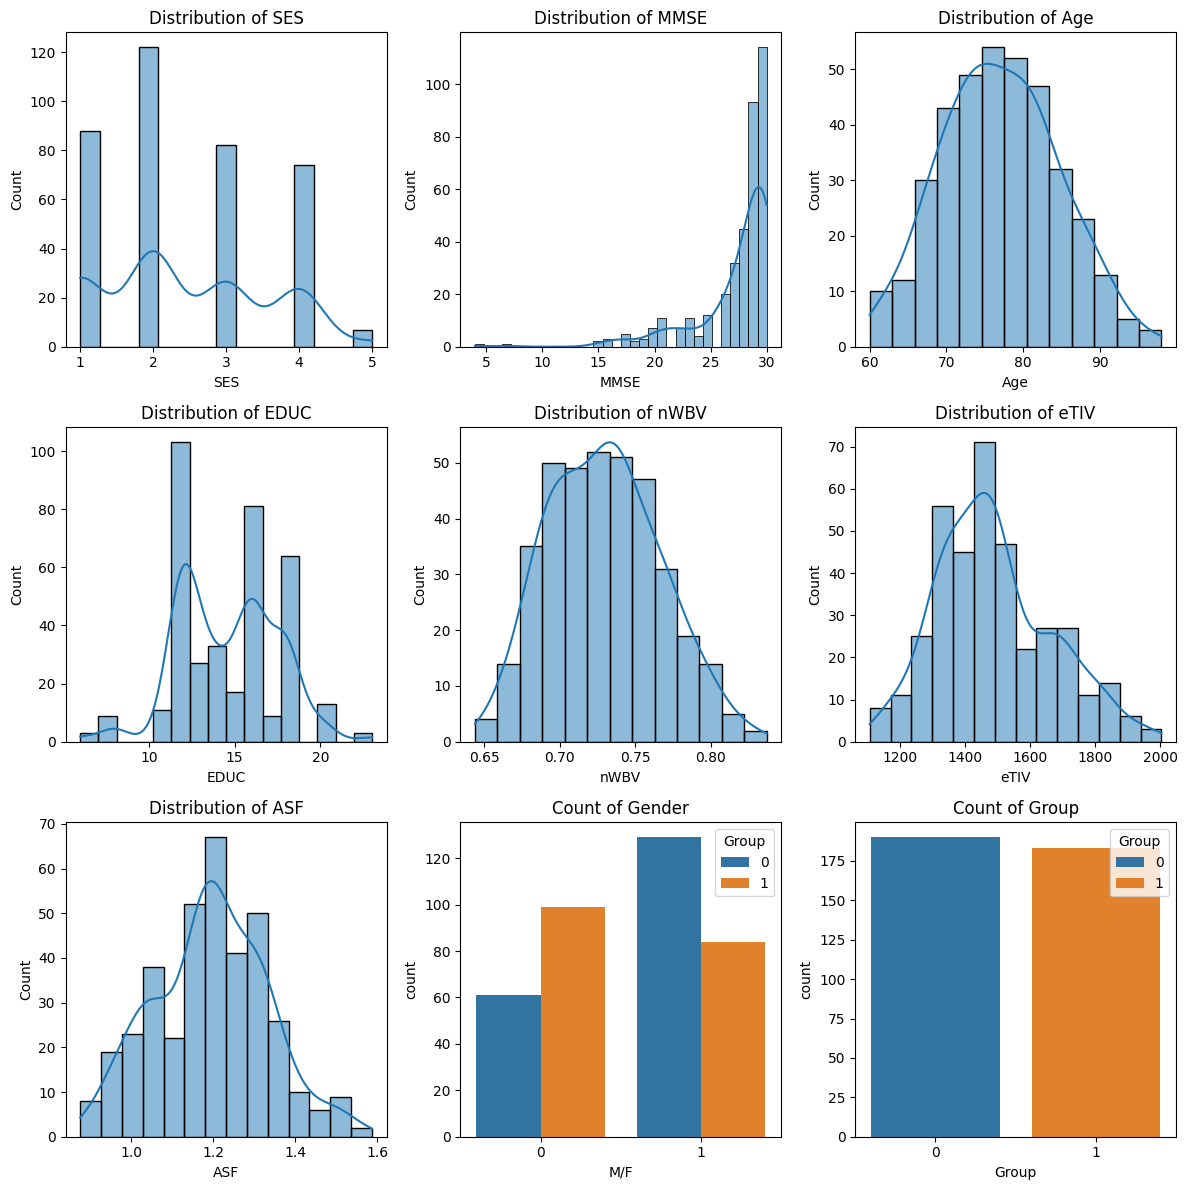

In [113]:
## Numeric Values
numeric_features = ['SES', 'MMSE', 'Age', 'EDUC', 'nWBV', 'eTIV', 'ASF']

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataframe[feature], kde=True)
    plt.title(f'Distribution of {feature}')

## Categorical Values

plt.subplot(3, 3, 8)
sns.countplot(data=dataframe, x=dataframe['M/F'], hue='Group')
plt.title(f'Count of Gender')

plt.subplot(3, 3, 9)
sns.countplot(data=dataframe, x=dataframe['Group'], hue='Group')
plt.title(f'Count of Group')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show plot
plt.show()


 ## Bivariate Analysis

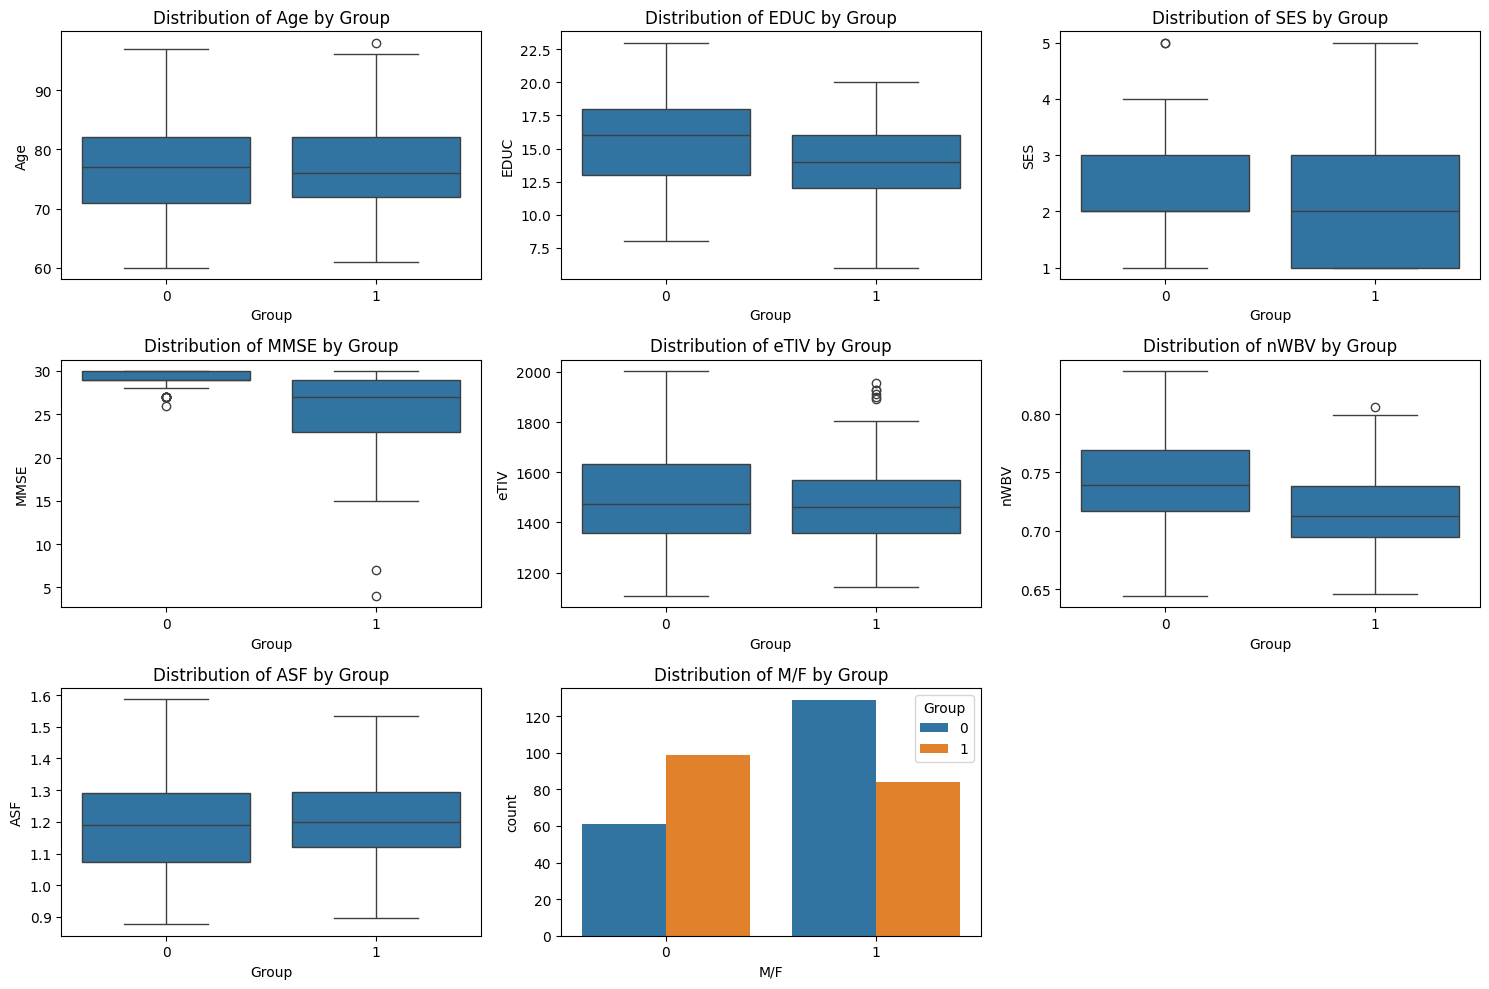

In [114]:
# Select numeric columns (excluding the 'group' column)
numeric_columns = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
plt.figure(figsize=(15, 10))

# Plot each numeric column against the 'group' column
for i, column in enumerate(numeric_columns,1):

    plt.subplot(3, 3, i)
    sns.boxplot(x='Group', y=column, data=dataframe)
    plt.title(f'Distribution of {column} by Group')
    plt.xlabel('Group')
    plt.ylabel(column)


plt.subplot(3, 3, 8)
sns.countplot(x=dataframe['M/F'], hue='Group', data=dataframe)
plt.title(f'Distribution of M/F by Group')
plt.legend(title='Group')

plt.tight_layout()
plt.show()




# Feature Selection

### Applying mRMR technique

In [115]:
# Exclude both 'Group' and 'Age_Group' columns
mrmr_data = dataframe.drop(columns=['Group'])

# Convert categorical variables to dummy variables
mrmr_data = pd.get_dummies(mrmr_data)

# Encode the target variable
mrmr_target = dataframe['Group'].astype('category').cat.codes

# Perform mRMR feature selection
mrmr_selected_features = mrmr_classif(X=mrmr_data, y=mrmr_target, K=5)

print("Selected features:", mrmr_selected_features)


100%|██████████| 5/5 [00:00<00:00, 22.40it/s]

Selected features: ['CDR', 'MMSE', 'nWBV', 'EDUC', 'M/F']


As shown the mRMR (minimum Redundancy Maximum Relevance) teqhuniqe chose the following columns: MMSE, nWBV, EDUC, M/F, and SES.

We will apply Correlation Coefficient to further assess the result.

### Applying Correlation Coefficient

In [116]:
# Find the pearson correlations matrix
corr = dataframe.corr(method = 'pearson')

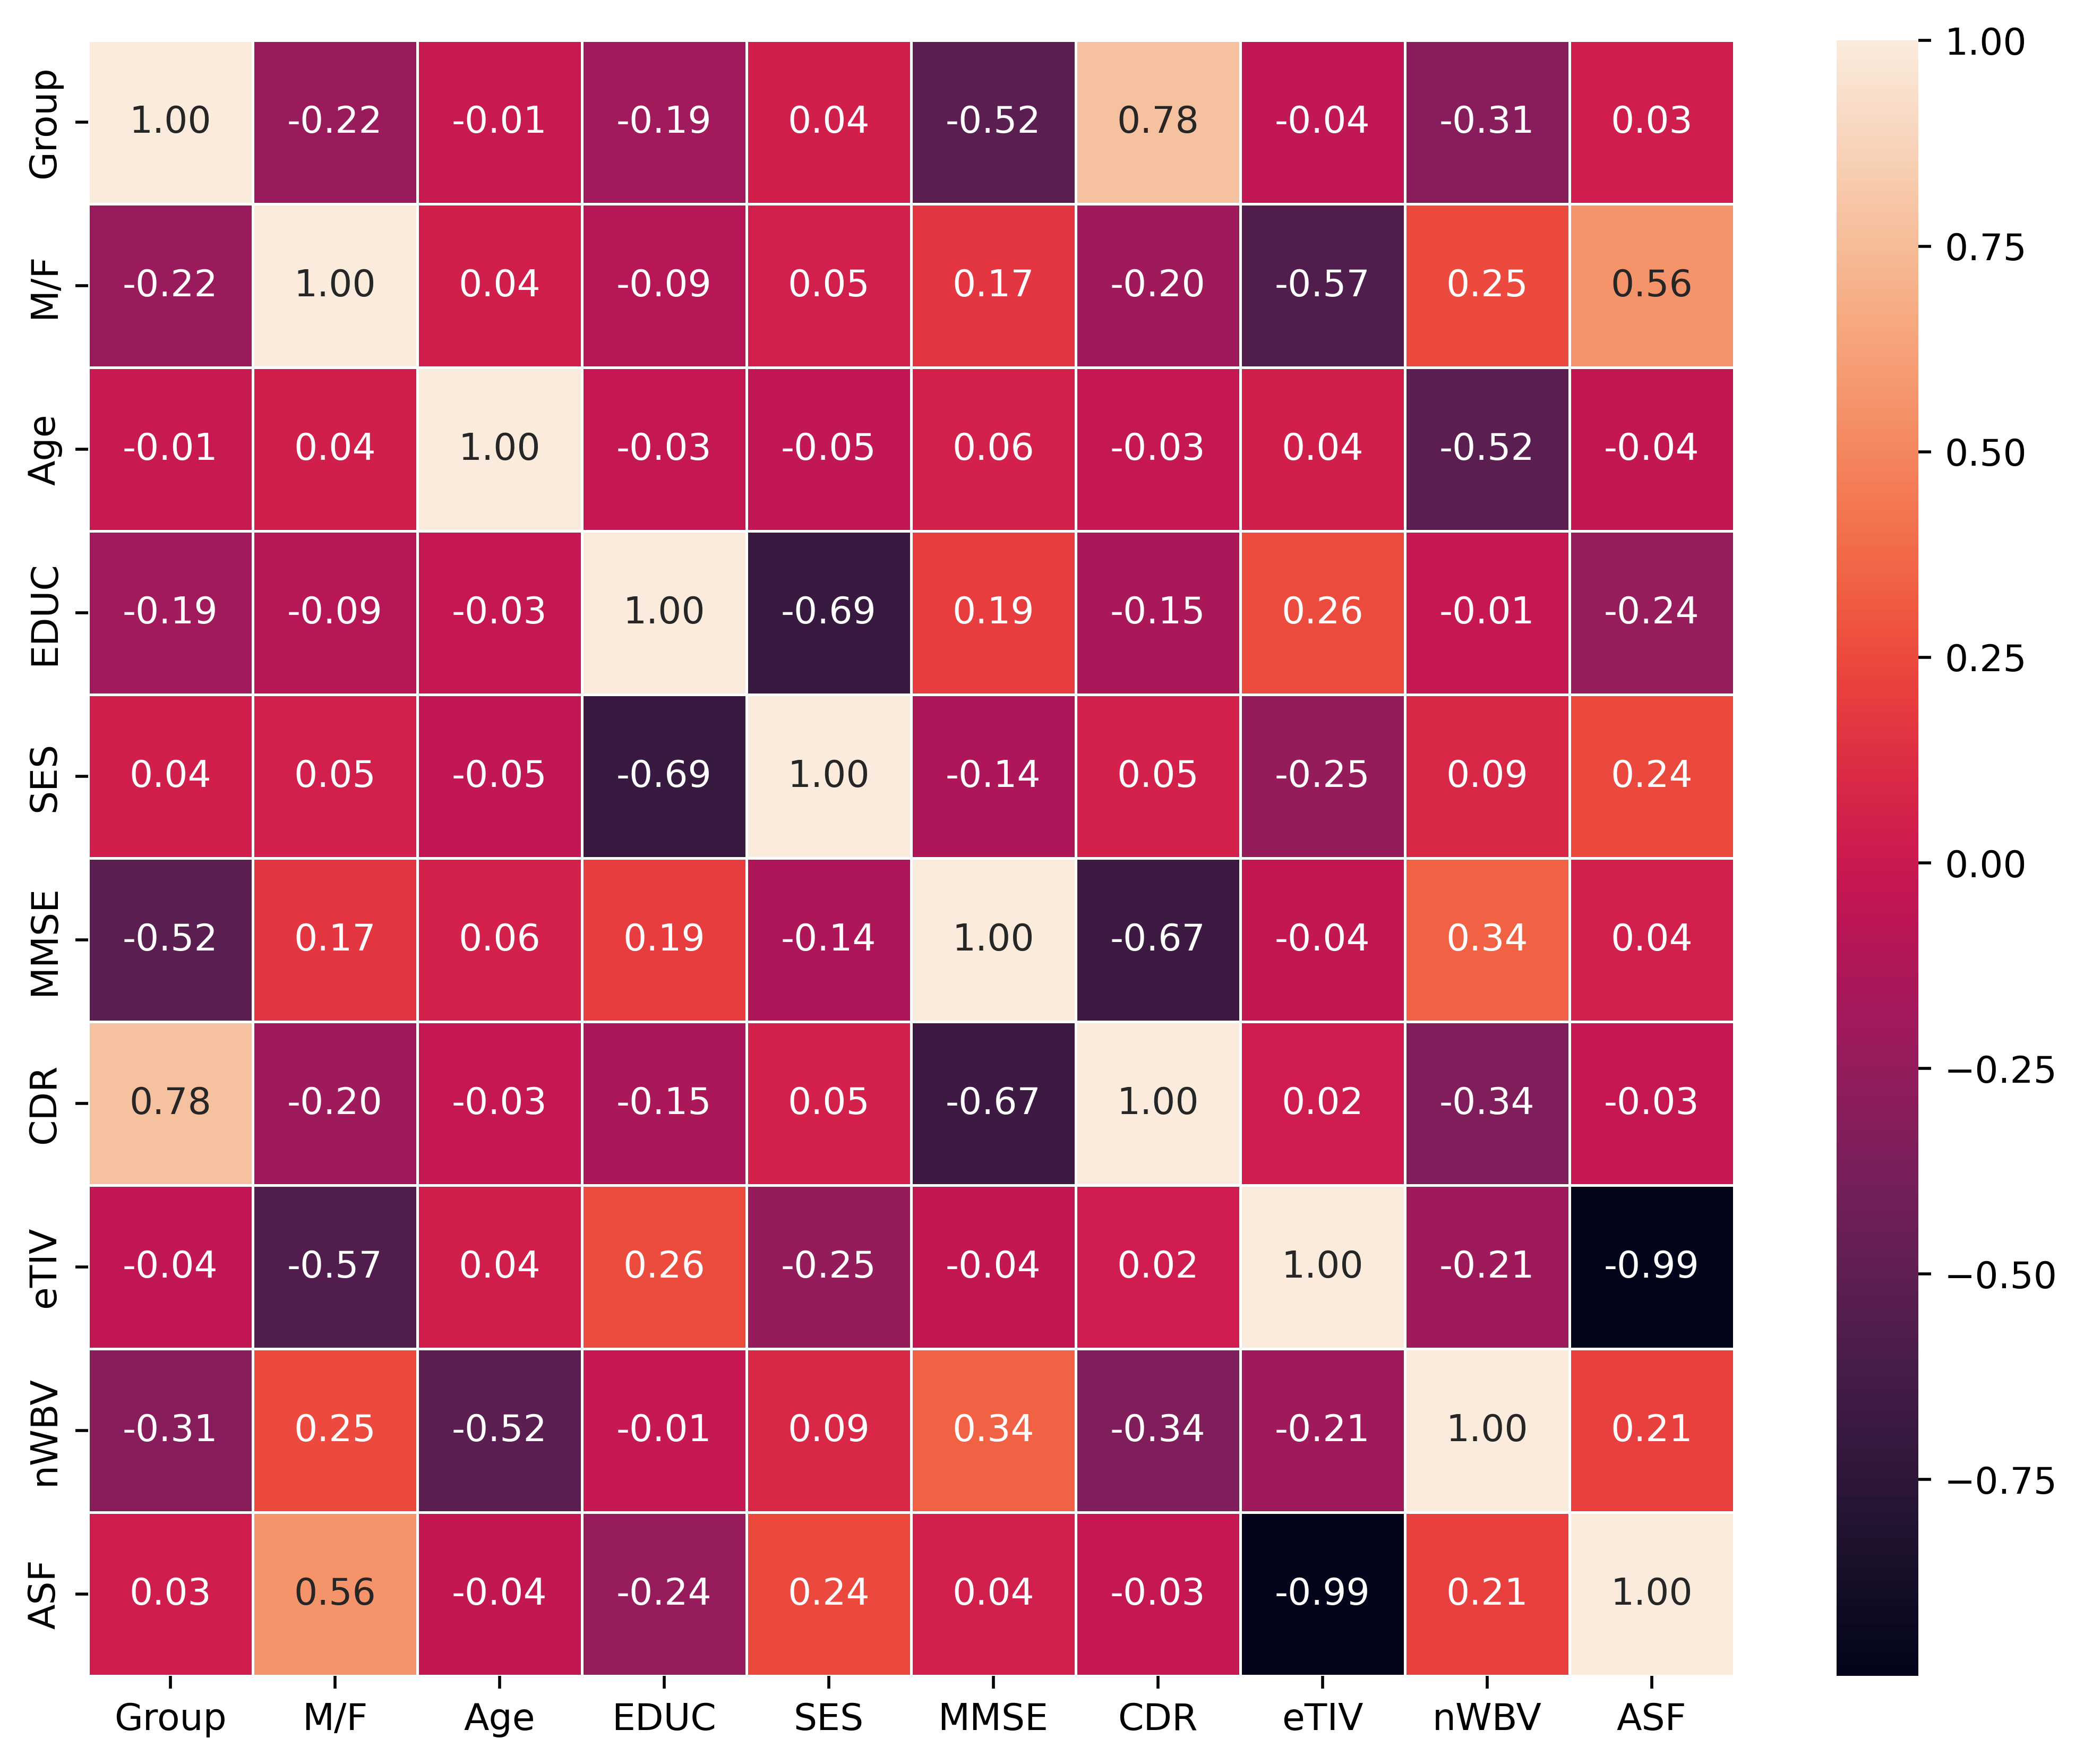

In [117]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

the map futrher affirms the results of the mRMR teqhuniqe, therefore, we will remove the irrelevant features.

### Applying Mutual Information

In [118]:
# Drop the target column 'Group' from the features
X = dataframe.drop(labels=['Group'], axis=1)

# Convert any categorical variables into numerical format
X = pd.get_dummies(X)

# Extract the target variable
y = dataframe['Group']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Compute mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X_train, y_train)

mutual_info

array([0.        , 0.        , 0.04207509, 0.03246252, 0.24513068,
       0.47105646, 0.06465931, 0.05584249, 0.06183668])

In [119]:
# Convert mutual_info array to a pandas Series
mutual_info_series = pd.Series(mutual_info, index=X_train.columns)

# Sort the mutual information scores in descending order
mutual_info_sorted = mutual_info_series.sort_values(ascending=False)

# Print the sorted mutual information scores
print("Sorted mutual information scores:\n", mutual_info_sorted)

Sorted mutual information scores:
 CDR     0.471056
MMSE    0.245131
eTIV    0.064659
ASF     0.061837
nWBV    0.055842
EDUC    0.042075
SES     0.032463
M/F     0.000000
Age     0.000000
dtype: float64


<Axes: >

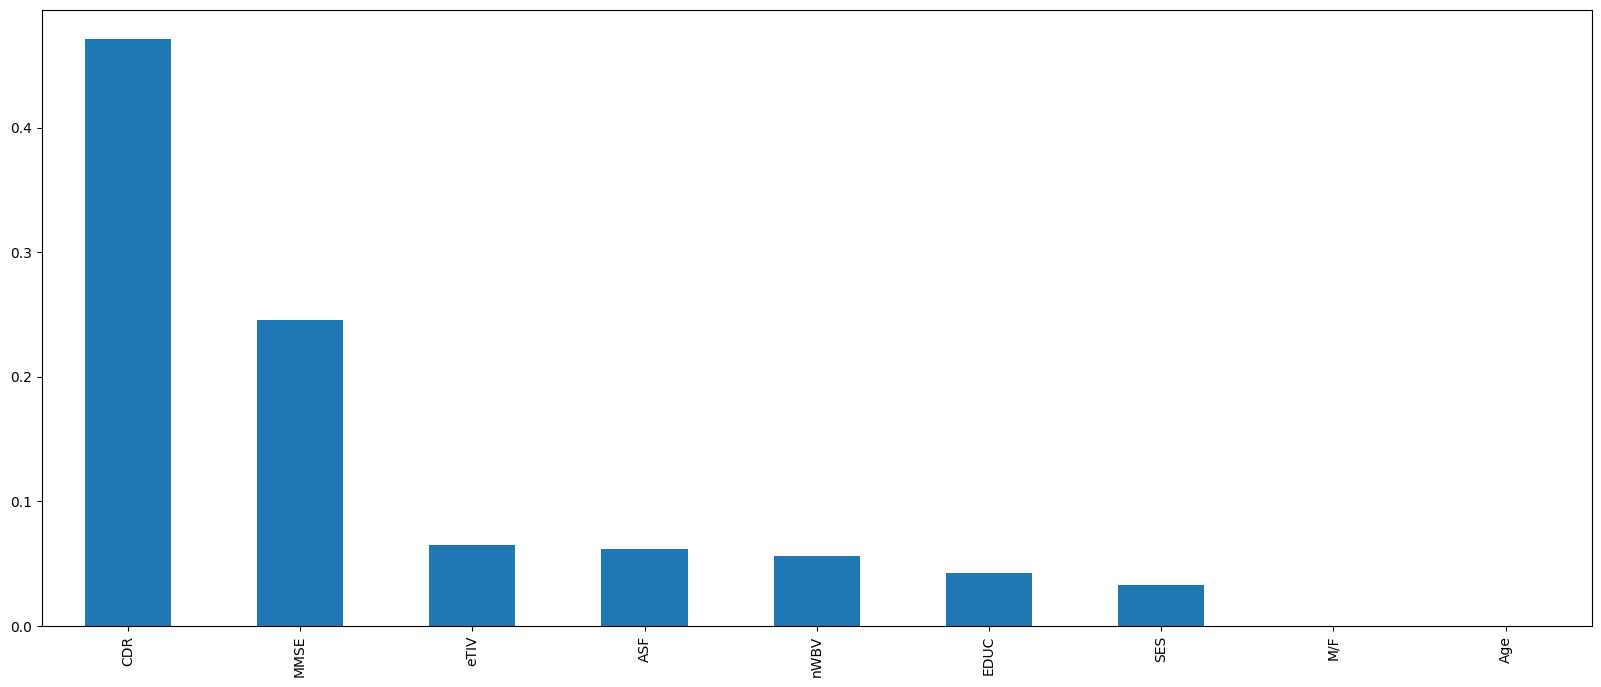

In [120]:
mutual_info_series.sort_values(ascending=False).plot.bar(figsize=(20, 8))

As shown the information gain teqhuniqe suggests the following columns (in descending order): MMSE, nWBV, eTIV, ASF, EDUC, Age, M/F, SES.

we will choose the top 5 columns which are: MMSE, nWBV, eTIV, ASF, EDUC.


# Removing Irrelevant Features

# mRMR Technique

In [121]:
mrmr_dataframe_selected_features = dataframe[['Group'] + mrmr_selected_features ]
mrmr_dataframe_selected_features.head()

,Group,CDR,MMSE,nWBV,EDUC,M/F
0,0,0.0,27.0,0.696,14,0
1,0,0.0,30.0,0.681,14,0
2,1,0.5,23.0,0.736,12,0
3,1,0.5,28.0,0.713,12,0
4,1,0.5,22.0,0.701,12,0


# Mutual Information Technique

In [122]:
infog_dataframe_selected_features = dataframe[['Group'] + ['CDR']  + ['MMSE'] + ['SES'] + ['eTIV'] + ['ASF']]
infog_dataframe_selected_features.head()

,Group,CDR,MMSE,SES,eTIV,ASF
0,0,0.0,27.0,2.0,1987,0.883
1,0,0.0,30.0,2.0,2004,0.876
2,1,0.5,23.0,2.0,1678,1.046
3,1,0.5,28.0,2.0,1738,1.010
4,1,0.5,22.0,2.0,1698,1.034


# Machine Learning Model

# SVM

### SVM All features

####  k-fold =10

In [123]:
X=dataframe.drop(columns=['Group'])
y=dataframe['Group']

In [124]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [125]:
k_folds = KFold(n_splits = 10)
scores = cross_val_score(clf, X, y, cv = k_folds)

In [126]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.86842105 0.94736842 0.97368421 0.97297297 1.         0.94594595
 0.94594595 0.86486486 1.         0.94594595]
Average CV Score:  0.9465149359886202
Number of CV Scores used in Average:  10


#### k-fold=5

In [127]:
# Separate features (X) and labels (y)
X = dataframe.drop(columns=['Group'])
y = dataframe['Group']

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.90666667 0.96       0.97333333 0.93243243 0.97297297]
Average CV Score: 0.949081081081081
Number of CV Scores used in Average: 5


#### leave one out

In [128]:
# Separate features (X) and labels (y)
X = dataframe.drop(columns=['Group'])
y = dataframe['Group']

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print("Number of CV Scores:", len(scores))
print("Average CV Score:", scores.mean())

Number of CV Scores: 373
Average CV Score: 0.9463806970509383


## SVM mRMR

####k-fold=10

In [129]:
X=mrmr_dataframe_selected_features.drop(columns=['Group'])
y=mrmr_dataframe_selected_features['Group']

In [130]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [131]:
k_folds = KFold(n_splits = 10)
scores = cross_val_score(clf, X, y, cv = k_folds)

In [132]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.86842105 0.94736842 0.94736842 0.97297297 1.         0.94594595
 0.94594595 0.89189189 1.         0.94594595]
Average CV Score:  0.9465860597439544
Number of CV Scores used in Average:  10


#### k-fold=5

In [133]:
# Separate features (X) and labels (y)
X=mrmr_dataframe_selected_features.drop(columns=['Group'])
y=mrmr_dataframe_selected_features['Group']

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.90666667 0.96       0.97333333 0.91891892 0.97297297]
Average CV Score: 0.9463783783783783
Number of CV Scores used in Average: 5


#### leave one out

In [134]:
# Separate features (X) and labels (y)
X=mrmr_dataframe_selected_features.drop(columns=['Group'])
y=mrmr_dataframe_selected_features['Group']

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print("Number of CV Scores:", len(scores))
print("Average CV Score:", scores.mean())

Number of CV Scores: 373
Average CV Score: 0.9463806970509383


## SVM mutual information

#### k-fold=10

In [135]:
X=infog_dataframe_selected_features.drop(columns=['Group'])
y=infog_dataframe_selected_features['Group']

In [136]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [137]:
k_folds = KFold(n_splits = 10)
scores = cross_val_score(clf, X, y, cv = k_folds)

In [138]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.86842105 0.94736842 0.97368421 0.97297297 1.         0.94594595
 0.94594595 0.89189189 1.         0.94594595]
Average CV Score:  0.9492176386913229
Number of CV Scores used in Average:  10


####k-fold=5

In [139]:
# Separate features (X) and labels (y)
X=infog_dataframe_selected_features.drop(columns=['Group'])
y=infog_dataframe_selected_features['Group']

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.90666667 0.97333333 0.97333333 0.87837838 0.97297297]
Average CV Score: 0.940936936936937
Number of CV Scores used in Average: 5


####leave one out

In [140]:
# Separate features (X) and labels (y)
X=infog_dataframe_selected_features.drop(columns=['Group'])
y=infog_dataframe_selected_features['Group']

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print("Number of CV Scores:", len(scores))
print("Average CV Score:", scores.mean())

Number of CV Scores: 373
Average CV Score: 0.9517426273458445


## Logistic Regression

### Logistic Regression - All Features

#### 5-fold

In [141]:
# Separate features (X) and labels (y)
X = dataframe.drop(columns=['Group'])
y = dataframe['Group']

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.77333333 0.96       0.97333333 0.91891892 0.97297297]
Average CV Score: 0.9197117117117118
Number of CV Scores used in Average: 5


#### 10-fold

In [142]:
# Separate features (X) and labels (y)
X = dataframe.drop(columns=['Group'])
y = dataframe['Group']

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=10)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.86842105 0.94736842 0.94736842 0.97297297 1.         0.94594595
 0.94594595 0.78378378 1.         0.94594595]
Average CV Score: 0.9357752489331437
Number of CV Scores used in Average: 10


#### Leave-One-Out Cross-Validation (LOOCV)

In [143]:
# Separate features (X) and labels (y)
X = dataframe.drop(columns=['Group'])
y = dataframe['Group']

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print("Number of CV Scores:", len(scores))
print("Average CV Score:", scores.mean())

Number of CV Scores: 373
Average CV Score: 0.9436997319034852


### Logistic Regression - mRMR

#### 5-fold

In [144]:
# Separate features (X) and labels (y)
X = mrmr_dataframe_selected_features.drop(columns=['Group'])
y = mrmr_dataframe_selected_features['Group']

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Define the number of splits for 5-fold cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.90666667 0.96       0.97333333 0.93243243 0.97297297]
Average CV Score: 0.949081081081081
Number of CV Scores used in Average: 5


#### 10-fold

In [145]:
# Separate features (X) and labels (y)
X = mrmr_dataframe_selected_features.drop(columns=['Group'])
y = mrmr_dataframe_selected_features['Group']

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Define the number of splits for 10-fold cross-validation
k_folds = KFold(n_splits=10)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.86842105 0.94736842 0.94736842 0.97297297 1.         0.94594595
 0.94594595 0.91891892 1.         0.94594595]
Average CV Score: 0.9492887624466573
Number of CV Scores used in Average: 10


#### Leave-One-Out Cross-Validation (LOOCV)

In [146]:
# Separate features (X) and labels (y)
X = mrmr_dataframe_selected_features.drop(columns=['Group'])
y = mrmr_dataframe_selected_features['Group']

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print("Number of CV Scores:", len(scores))
print("Average CV Score:", scores.mean())

Number of CV Scores: 373
Average CV Score: 0.9463806970509383


### Logistic Regression - Mutual Information

#### 5-fold

In [147]:
# Separate features (X) and labels (y)
X = infog_dataframe_selected_features.drop(columns=['Group'])
y = infog_dataframe_selected_features['Group']

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Define the number of splits for 5-fold cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.90666667 0.96       0.97333333 0.91891892 0.97297297]
Average CV Score: 0.9463783783783783
Number of CV Scores used in Average: 5


#### 10-fold

In [148]:
# Separate features (X) and labels (y)
X = infog_dataframe_selected_features.drop(columns=['Group'])
y = infog_dataframe_selected_features['Group']

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Define the number of splits for 10-fold cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.90666667 0.96       0.97333333 0.91891892 0.97297297]
Average CV Score: 0.9463783783783783
Number of CV Scores used in Average: 5


#### Leave-One-Out Cross-Validation (LOOCV)

In [149]:
# Separate features (X) and labels (y)
X = infog_dataframe_selected_features.drop(columns=['Group'])
y = infog_dataframe_selected_features['Group']

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print("Number of CV Scores:", len(scores))
print("Average CV Score:", scores.mean())

Number of CV Scores: 373
Average CV Score: 0.9463806970509383


## Random Forest

### All features

#### K-fold=10

In [150]:
# Separate features (X) and labels (y)
X = dataframe.drop(columns=['Group'])
y = dataframe['Group']

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=10)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.86842105 0.94736842 0.94736842 0.97297297 1.         0.94594595
 0.94594595 0.78378378 1.         0.94594595]
Average CV Score: 0.9357752489331437
Number of CV Scores used in Average: 10


#### k-fold=5

In [151]:
# Separate features (X) and labels (y)
X = dataframe.drop(columns=['Group'])
y = dataframe['Group']

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.77333333 0.96       0.97333333 0.91891892 0.97297297]
Average CV Score: 0.9197117117117118
Number of CV Scores used in Average: 5


#### leave one out

In [152]:
# Separate features (X) and labels (y)
X = dataframe.drop(columns=['Group'])
y = dataframe['Group']

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print("Number of CV Scores:", len(scores))
print("Average CV Score:", scores.mean())

Number of CV Scores: 373
Average CV Score: 0.9436997319034852


### mRMR

#### k-fold=10

In [153]:
# Separate features (X) and labels (y)
X = mrmr_dataframe_selected_features.drop(columns=['Group'])
y = mrmr_dataframe_selected_features['Group']

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=10)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.86842105 0.94736842 0.94736842 0.97297297 1.         0.94594595
 0.94594595 0.91891892 1.         0.94594595]
Average CV Score: 0.9492887624466573
Number of CV Scores used in Average: 10


####k-fold=5

In [154]:
# Separate features (X) and labels (y)
X = mrmr_dataframe_selected_features.drop(columns=['Group'])
y = mrmr_dataframe_selected_features['Group']

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.90666667 0.96       0.97333333 0.93243243 0.97297297]
Average CV Score: 0.949081081081081
Number of CV Scores used in Average: 5


#### leave one out

In [155]:
# Separate features (X) and labels (y)
X = mrmr_dataframe_selected_features.drop(columns=['Group'])
y = mrmr_dataframe_selected_features['Group']

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print("Number of CV Scores:", len(scores))
print("Average CV Score:", scores.mean())

Number of CV Scores: 373
Average CV Score: 0.9463806970509383


### mutual information

#### k-fold =10

In [156]:
# Separate features (X) and labels (y)
X = infog_dataframe_selected_features.drop(columns=['Group'])
y = infog_dataframe_selected_features['Group']

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=10)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.86842105 0.94736842 0.94736842 0.97297297 1.         0.94594595
 0.94594595 0.89189189 1.         0.94594595]
Average CV Score: 0.9465860597439544
Number of CV Scores used in Average: 10


#### k-fold=5

In [157]:
# Separate features (X) and labels (y)
X = infog_dataframe_selected_features.drop(columns=['Group'])
y = infog_dataframe_selected_features['Group']

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Define the number of splits for cross-validation
k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=k_folds)

# Print the results
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())
print("Number of CV Scores used in Average:", len(scores))

Cross Validation Scores: [0.90666667 0.96       0.97333333 0.91891892 0.97297297]
Average CV Score: 0.9463783783783783
Number of CV Scores used in Average: 5


#### leave one out

In [158]:
# Separate features (X) and labels (y)
X = infog_dataframe_selected_features.drop(columns=['Group'])
y = infog_dataframe_selected_features['Group']

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=150, random_state=109)

# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print("Number of CV Scores:", len(scores))
print("Average CV Score:", scores.mean())

Number of CV Scores: 373
Average CV Score: 0.9463806970509383


# 70% train and 30% testing

## SVM

### SVM - All Features

In [186]:
# Split dataset into training set and test set
svmXall_train, svmXall_test, svmyall_train, svmyall_test = train_test_split(dataframe.drop(columns=['Group']), dataframe['Group'], test_size=0.3,random_state=109) # 70% training and 30% test

In [187]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svmXall_train, svmyall_train)

#Predict the response for test dataset
svmyall_pred = clf.predict(svmXall_test)

In [188]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svmyall_test, svmyall_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(svmyall_test, svmyall_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(svmyall_test, svmyall_pred))

Accuracy: 0.9642857142857143
Precision: 0.9811320754716981
Recall: 0.9454545454545454


### SVM - mRMR

In [189]:
# Split dataset into training set and test set
svmXmrmr_train, svmXmrmr_test, svmymrmr_train, svmymrmr_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3,random_state=109) # 70% training and 30% test

In [190]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svmXmrmr_train, svmymrmr_train)

#Predict the response for test dataset
svmymrmr_pred = clf.predict(svmXmrmr_test)

In [191]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svmymrmr_test, svmymrmr_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(svmymrmr_test, svmymrmr_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(svmymrmr_test, svmymrmr_pred))

Accuracy: 0.9732142857142857
Precision: 1.0
Recall: 0.9454545454545454


### SVM - Mutual Information

In [192]:
# Split dataset into training set and test set
svmXig_train, svmXig_test, svmyig_train, svmyig_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3,random_state=109) # 70% training and 30% test

In [193]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svmXig_train, svmyig_train)

#Predict the response for test dataset
svmyig_pred = clf.predict(svmXig_test)

In [194]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svmyig_test, svmyig_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(svmyig_test, svmyig_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(svmyig_test, svmyig_pred))

Accuracy: 0.9732142857142857
Precision: 1.0
Recall: 0.9454545454545454


## Logistic Regression

### Logistic Regression - All Features

In [195]:
# Split dataset into training set and test set
lrXall_train, lrXall_test, lryall_train, lryall_test = train_test_split(dataframe.drop(columns=['Group']), dataframe['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Train the model using the training sets
clf.fit(lrXall_train, lryall_train)

# Predict the response for test dataset
lryall_pred = clf.predict(lrXall_test)

# Model evaluation
print("Accuracy:", metrics.accuracy_score(lryall_test, lryall_pred))
print("Precision:", metrics.precision_score(lryall_test, lryall_pred))
print("Recall:", metrics.recall_score(lryall_test, lryall_pred))

Accuracy: 0.9642857142857143
Precision: 0.9811320754716981
Recall: 0.9454545454545454


### Logistic Regression - mRMR

In [196]:

# Split dataset into training set and test set
lrXmrmr_train, lrXmrmr_test, lrymrmr_train, lrymrmr_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Train the model using the training sets
clf.fit(lrXmrmr_train, lrymrmr_train)

# Predict the response for test dataset
lrymrmr_pred = clf.predict(lrXmrmr_test)

# Model Evaluation
print("Accuracy:",metrics.accuracy_score(lrymrmr_test, lrymrmr_pred))
print("Precision:",metrics.precision_score(lrymrmr_test, lrymrmr_pred))
print("Recall:",metrics.recall_score(lrymrmr_test, lrymrmr_pred))

Accuracy: 0.9732142857142857
Precision: 1.0
Recall: 0.9454545454545454


### Logistic Regression - Mutual Information

In [197]:

# Split dataset into training set and test set
lrXig_train, lrXig_test, lryig_train, lryig_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
clf = LogisticRegression()

# Train the model using the training sets
clf.fit(lrXig_train, lryig_train)

# Predict the response for test dataset
lryig_pred = clf.predict(lrXig_test)

# Model evaluation
print("Accuracy:",metrics.accuracy_score(lryig_test, lryig_pred))
print("Precision:",metrics.precision_score(lryig_test, lryig_pred))
print("Recall:",metrics.recall_score(lryig_test, lryig_pred))

Accuracy: 0.9732142857142857
Precision: 1.0
Recall: 0.9454545454545454


### Cross-Validation

In [198]:
# Define a parameter grid for n_estimators
param_grid = {'n_estimators': [50, 100, 150, 200]}

# Model 1
# Split dataset into training set and test set
lrXall_train, lrXall_test, lryall_train, lryall_test = train_test_split(dataframe.drop(columns=['Group']), dataframe['Group'], test_size=0.3, random_state=109) # 70% training and 30% test
base_clf = LogisticRegression()
boosted_clf = AdaBoostClassifier(base_estimator=base_clf, random_state=109)
grid_search_1 = GridSearchCV(boosted_clf, param_grid, cv=5, scoring='accuracy')
grid_search_1.fit(lrXall_train, lryall_train)
print("Best n_estimators for Model 1:", grid_search_1.best_params_)

# Model 2
# Split dataset into training set and test set
lrXig_train, lrXig_test, lryig_train, lryig_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test
base_clf = LogisticRegression()
boosted_clf = AdaBoostClassifier(base_estimator=base_clf, random_state=109)
grid_search_2 = GridSearchCV(boosted_clf, param_grid, cv=5, scoring='accuracy')
grid_search_2.fit(lrXig_train, lryig_train)
print("Best n_estimators for Model 2:", grid_search_2.best_params_)

# Model 3
# Split dataset into training set and test set
lrXmrmr_train, lrXmrmr_test, lrymrmr_train, lrymrmr_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test
base_clf = LogisticRegression()
boosted_clf = AdaBoostClassifier(base_estimator=base_clf, random_state=109)
grid_search_3 = GridSearchCV(boosted_clf, param_grid, cv=5, scoring='accuracy')
grid_search_3.fit(lrXmrmr_train, lrymrmr_train)
print("Best n_estimators for Model 3:", grid_search_3.best_params_)

Best n_estimators for Model 1: {'n_estimators': 150}
Best n_estimators for Model 2: {'n_estimators': 200}
Best n_estimators for Model 3: {'n_estimators': 100}


## Boosted Logistic Regression

### Boosted Logistic Regression - All Features

In [199]:
# Split dataset into training set and test set
lrXall_train, lrXall_test, lryall_train, lryall_test = train_test_split(dataframe.drop(columns=['Group']), dataframe['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
base_clf = LogisticRegression()

# Create an AdaBoost classifier with logistic regression as base estimator
boosted_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=150, random_state=109)

# Train the boosted model using the training sets
boosted_clf.fit(lrXall_train, lryall_train)

# Predict the response for test dataset using the boosted model
lryall_pred_boosted = boosted_clf.predict(lrXall_test)

# Model evaluation
print("Accuracy (boosted):", metrics.accuracy_score(lryall_test, lryall_pred_boosted))
print("Precision (boosted):", metrics.precision_score(lryall_test, lryall_pred_boosted))
print("Recall (boosted):", metrics.recall_score(lryall_test, lryall_pred_boosted))

Accuracy (boosted): 0.9642857142857143
Precision (boosted): 0.9811320754716981
Recall (boosted): 0.9454545454545454


### Boosted Logistic Regression - mRMR

In [200]:
# Split dataset into training set and test set
lrXmrmr_train, lrXmrmr_test, lrymrmr_train, lrymrmr_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
base_clf = LogisticRegression()

# Create an AdaBoost classifier with logistic regression as base estimator
boosted_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=100, random_state=109)

# Train the boosted model using the training sets
boosted_clf.fit(lrXmrmr_train, lrymrmr_train)

# Predict the response for test dataset using the boosted model
lrymrmr_pred_boosted = boosted_clf.predict(lrXmrmr_test)

# Model Evaluation
print("Accuracy (boosted):", metrics.accuracy_score(lrymrmr_test, lrymrmr_pred_boosted))
print("Precision (boosted):", metrics.precision_score(lrymrmr_test, lrymrmr_pred_boosted))
print("Recall (boosted):", metrics.recall_score(lrymrmr_test, lrymrmr_pred_boosted))


Accuracy (boosted): 0.9642857142857143
Precision (boosted): 0.9811320754716981
Recall (boosted): 0.9454545454545454


### Boosted Logistic Regression - Mutual Information

In [201]:
# Split dataset into training set and test set
lrXig_train, lrXig_test, lryig_train, lryig_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Logistic Regression Classifier
base_clf = LogisticRegression()

# Create an AdaBoost classifier with logistic regression as base estimator
boosted_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=200, random_state=109)

# Train the boosted model using the training sets
boosted_clf.fit(lrXig_train, lryig_train)

# Predict the response for test dataset using the boosted model
lryig_pred_boosted = boosted_clf.predict(lrXig_test)

# Model Evaluation
print("Accuracy (boosted):", metrics.accuracy_score(lryig_test, lryig_pred_boosted))
print("Precision (boosted):", metrics.precision_score(lryig_test, lryig_pred_boosted))
print("Recall (boosted):", metrics.recall_score(lryig_test, lryig_pred_boosted))

Accuracy (boosted): 0.9732142857142857
Precision (boosted): 1.0
Recall (boosted): 0.9454545454545454


## Random Forest

### Cross-Validation

In [202]:
# Define a parameter grid for n_estimators
param_grid = {'n_estimators': [50, 100, 150, 200]}

# Model 1
# Split dataset into training set and test set
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=109)
clf_1 = RandomForestClassifier(random_state=109)
grid_search_1 = GridSearchCV(clf_1, param_grid, cv=5, scoring='accuracy')
grid_search_1.fit(X_train_1, y_train_1)
print("Best n_estimators for Model 1:", grid_search_1.best_params_)

# Model 2
# Split dataset into training set and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109)
clf_2 = RandomForestClassifier(random_state=109)
grid_search_2 = GridSearchCV(clf_2, param_grid, cv=5, scoring='accuracy')
grid_search_2.fit(X_train_2, y_train_2)
print("Best n_estimators for Model 2:", grid_search_2.best_params_)

# Model 3
# Split dataset into training set and test set
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109)
clf_3 = RandomForestClassifier(random_state=109)
grid_search_3 = GridSearchCV(clf_3, param_grid, cv=5, scoring='accuracy')
grid_search_3.fit(X_train_3, y_train_3)
print("Best n_estimators for Model 3:", grid_search_3.best_params_)

Best n_estimators for Model 1: {'n_estimators': 100}
Best n_estimators for Model 2: {'n_estimators': 150}
Best n_estimators for Model 3: {'n_estimators': 100}


### Random Forest - All Features

In [203]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=109)

# Train the classifier
random_forest.fit(X_train, y_train)

# Make predictions
predictions = random_forest.predict(X_test)

# Model Evalution
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
precision = precision_score(y_test, predictions, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, predictions, average='weighted')
print("Recall:", recall)

Accuracy: 0.9553571428571429
Precision: 0.9555165816326531
Recall: 0.9553571428571429


### Random Forest - mRMR

In [204]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=150, random_state=109)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9553571428571429
Precision: 0.9555165816326531
Recall: 0.9553571428571429


### Random Forest - Mutual Information

In [205]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109) # 70% training and 30% test

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=109)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9553571428571429
Precision: 0.9555165816326531
Recall: 0.9553571428571429


## Boosted Random Forest

### Cross-Validation

In [206]:
# Define a parameter grid for n_estimators for AdaBoost
param_grid_adaboost = {'n_estimators': [50, 100, 150, 200]}

# Model 1 - AdaBoost
# Split dataset into training set and test set
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=109)
base_clf_1 = RandomForestClassifier(random_state=109)
ada_clf_1 = AdaBoostClassifier(base_estimator=base_clf_1, random_state=109)
grid_search_ada_1 = GridSearchCV(ada_clf_1, param_grid_adaboost, cv=5, scoring='accuracy')
grid_search_ada_1.fit(X_train_1, y_train_1)
print("Best n_estimators for Model 1 (AdaBoost):", grid_search_ada_1.best_params_)

# Model 2 - AdaBoost
# Split dataset into training set and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109)
base_clf_2 = RandomForestClassifier(random_state=109)
ada_clf_2 = AdaBoostClassifier(base_estimator=base_clf_2, random_state=109)
grid_search_ada_2 = GridSearchCV(ada_clf_2, param_grid_adaboost, cv=5, scoring='accuracy')
grid_search_ada_2.fit(X_train_2, y_train_2)
print("Best n_estimators for Model 2 (AdaBoost):", grid_search_ada_2.best_params_)

# Model 3 - AdaBoost
# Split dataset into training set and test set
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109)
base_clf_3 = RandomForestClassifier(random_state=109)
ada_clf_3 = AdaBoostClassifier(base_estimator=base_clf_3, random_state=109)
grid_search_ada_3 = GridSearchCV(ada_clf_3, param_grid_adaboost, cv=5, scoring='accuracy')
grid_search_ada_3.fit(X_train_3, y_train_3)
print("Best n_estimators for Model 3 (AdaBoost):", grid_search_ada_3.best_params_)

Best n_estimators for Model 1 (AdaBoost): {'n_estimators': 50}
Best n_estimators for Model 2 (AdaBoost): {'n_estimators': 50}
Best n_estimators for Model 3 (AdaBoost): {'n_estimators': 50}


### Boosted Random Forest - All Features

In [207]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=109)

# Initialize AdaBoost Classifier with Random Forest as base estimator
adaboost = AdaBoostClassifier(base_estimator=random_forest, n_estimators=50, random_state=109)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Make predictions
predictions = adaboost.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')

print("AdaBoost Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

AdaBoost Performance:
Accuracy: 0.9375
Precision: 0.9388170498084291
Recall: 0.9375


### Boosted Random Forest - mRMR

In [208]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3, random_state=109)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=150, random_state=109)

# Initialize AdaBoost Classifier with Random Forest as base estimator
adaboost = AdaBoostClassifier(base_estimator=clf, n_estimators=50, random_state=109)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = adaboost.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("AdaBoost Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

AdaBoost Performance:
Accuracy: 0.9642857142857143
Precision: 0.9642857142857143
Recall: 0.9642857142857143


### Boosted Random Forest - Mutual Information

In [209]:
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3, random_state=109)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=109)

# Initialize AdaBoost Classifier with Random Forest as base estimator
adaboost = AdaBoostClassifier(base_estimator=clf, n_estimators=50, random_state=109)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = adaboost.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("AdaBoost Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


AdaBoost Performance:
Accuracy: 0.9375
Precision: 0.9388170498084291
Recall: 0.9375
